<a href="https://colab.research.google.com/github/prikshit-2000/Tensorflow/blob/main/Resnet_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,Lambda,BatchNormalization,MaxPooling2D,concatenate,Add,GlobalAveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.activations import relu
import numpy as np
import tensorflow_datasets as tfds


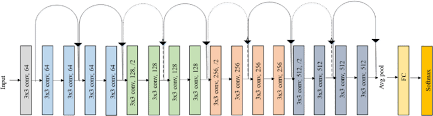

In [70]:
class IdentityResnetBlock(Model):
  def __init__(self,filters,kernel_size):

    super(IdentityResnetBlock,self).__init__(name='')

    self.conv1 = Conv2D(filters,kernel_size,padding = 'same')
    self.bn1 = BatchNormalization()

    self.conv2 = Conv2D(filters,kernel_size)
    self.bn2 = BatchNormalization()


    self.act = relu
    self.add = Add()

  def call(self,inputs):
    x = self.conv1(inputs)
    x = self.bn1(x)
    x = self.act(x)

    x = self.conv2(inputs)
    x = self.bn2(inputs)

    out = self.add([x,inputs])

    return self.act(out)


In [77]:
class Resnet(Model):
  def __init__(self,num_classes):
    super(Resnet,self).__init__()

    self.conv1 = Conv2D(64,7,padding  = 'same')
    self.bn1 = BatchNormalization()
    self.act = relu
    self.max_pool = MaxPooling2D((3,3))

    self.idb1 = IdentityResnetBlock(64,3)
    self.idb2 = IdentityResnetBlock(64,3)

    self.global_pool = GlobalAveragePooling2D()
    self.classifier  = Dense(num_classes , activation = 'softmax')

  def call(self,input_tensor):

    x = self.conv1(input_tensor)
    x =  self.bn1(x)
    x = self.act(x)
    x = self.max_pool(x)

    x = self.idb1(x)
    x = self.idb2(x)
    x = self.global_pool(x)
    x = self.classifier(x)

    return x

In [78]:
model = Resnet(10)

In [79]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [80]:
def preprocess(features):
  return tf.cast(features['image'],tf.float32)/255.0,features['label']

In [81]:
dataset = tfds.load('mnist' , split = tfds.Split.TRAIN)
dataset = dataset.map(preprocess).batch(32)

In [82]:
model.fit(dataset,epochs = 1)

1875/1875 [==============================] - 126s 67ms/step - loss: 0.7704 - accuracy: 0.8239
